# Stock Prediction



**利用三種不同的model預測股票的漲跌**

1.logistic regression

2.support vector machine

3.neural network

**What We Care**

我們在乎的是close price的高低
是我們要train的目標

## Data Preprocessing

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.metrics import accuracy_score
from keras import models, layers, optimizers, regularizers

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('./train_stock.csv')
df_test=pd.read_csv('./test_stock.csv')
df.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


Date:當天日期

Open Price:開盤價

Close Price:收盤價

High Price:當日最高價

Low Price:當日最低價

Volume:當日的總交易量|

## 利用圖表顯示歷年來的漲跌情形



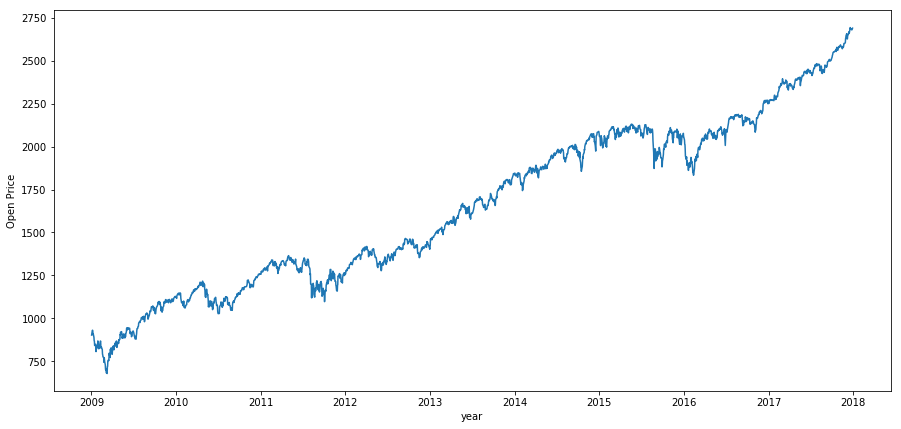

In [4]:
#將日期中的年份分出來
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year


plt.figure(figsize=(15,7))
plt.plot_date(df['Date'],df['Open Price'],'-')
plt.xlabel('year')
plt.ylabel('Open Price')
plt.show()


如果當天的Close Price比昨天高

視為漲，設為1

如果當天的Close Price比昨天低

視為跌，設為0




In [5]:
df['up/down']=np.zeros(len(df))
df_test['up/down']=np.zeros(len(df_test))

updown=np.zeros(len(df))
for index in range(len(df)-1):
    today=df.iloc[index,2]
    yesterday=df.iloc[index-1,2]
    if today>yesterday:
        updown[index-1]=1
    else:
        updown[index-1]=0
df['up/down']=updown

updown_test=np.zeros(len(df_test))
for index in range(len(df_test)-1):
    today=df_test.iloc[index,2]
    yesterday=df_test.iloc[index-1,2]
    if today>yesterday:
        updown_test[index-1]=1
    else:
        updown_test[index-1]=0
df_test['up/down']=updown_test   


In [6]:
df.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,year,up/down
0,2009-01-02,902.99,931.80,934.73,899.35,4048270080,2009,0.0
1,2009-01-05,929.17,927.45,936.63,919.53,5413910016,2009,1.0
2,2009-01-06,931.17,934.70,943.85,927.28,5392620032,2009,0.0
3,2009-01-07,927.45,906.65,927.45,902.37,4704940032,2009,1.0
4,2009-01-08,905.73,909.73,910.00,896.81,4991549952,2009,0.0


In [7]:
train_x=df[['Open Price','Close Price','High Price','Low Price','Volume']]
train_y=df[['up/down']]
test_x=df_test[['Open Price','Close Price','High Price','Low Price','Volume']]
test_y=df_test[['up/down']]

## logistic regression

準確率只有0.519

In [8]:
from sklearn.linear_model import LogisticRegression

logic_model= LogisticRegression()
logic_result= logic_model.fit(train_x, train_y)

logic_predict = logic_model.predict(test_x)
print(accuracy_score(test_y,logic_predict))

0.5198412698412699


### 試著減少feature的數量

只用 high price 與 low price 準確率變成0.508

In [10]:

logic_result_less= logic_model.fit(df[['High Price','Low Price']], train_y)
logic_predict_less = logic_model.predict(df_test[['High Price','Low Price']])
print(accuracy_score(test_y,logic_predict_less))

0.5079365079365079




利用high price , open price和close price 準確率剩下0.46

In [11]:
logic_result_price= logic_model.fit(df[['High Price','Open Price','Close Price']], train_y)
logic_predict_price = logic_model.predict(df_test[['High Price','Open Price','Close Price']])
print(accuracy_score(test_y,logic_predict_price))

0.4603174603174603


留下除了Volume以外的feature，準確率為0.48

In [12]:
logic_result_price= logic_model.fit(df[['Open Price','Close Price','High Price','Low Price']], train_y)
logic_predict_price = logic_model.predict(df_test[['Open Price','Close Price','High Price','Low Price']])
print(accuracy_score(test_y,logic_predict_price))

0.48412698412698413


In [13]:
logic_predict_price

array([1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1.

## support vector machine

與logistic regression一開始的結果一樣都是0.519，因為svm預設的kernel是linear的，

所以做出來的結果與linear regression一樣是可預見的

In [14]:
from sklearn import svm

svm_model = svm.SVC()
svm_result= svm_model.fit(train_x, train_y)

svm_predict=svm_model.predict(test_x)
print(accuracy_score(test_y,svm_predict))

0.5198412698412699


將kernel改成polynomial，準確度卻沒有改變

In [15]:
svm_model_poly = svm.SVC(kernel='poly')
svm_result_poly= svm_model_poly.fit(train_x, train_y)

svm_predict_poly = svm_model_poly.predict(test_x)
print(accuracy_score(test_y, svm_predict_poly))

0.5198412698412699


試著調整penalty，準確度仍然沒有改變

In [16]:
svm_model_penalty = svm.SVC(kernel='poly',C=3.0)
svm_result_lpenalty= svm_model_penalty.fit(train_x, train_y)

svm_predict_penalty = svm_model_penalty.predict(test_x)
print(accuracy_score(test_y, svm_predict_penalty))

0.5198412698412699


只用open price 與 close price與volume

依然維持0.519

In [17]:
svm_model_less = svm.SVC(kernel='poly',C=3.0)
svm_result_less= svm_model_less.fit(df[['Open Price','Close Price','Volume']], train_y)

svm_predict_less = svm_model_less.predict(df_test[['Open Price','Close Price','Volume']])
print(accuracy_score(test_y, svm_predict_less))

0.5198412698412699


令人意外的是

SVM做出來的prediction結果全部為1



In [18]:
svm_predict_less

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## neural network


In [19]:
hidden_units = 40    # how many neurons in the hidden layer
activation = 'sigmoid'  # activation function for hidden layer
l2 = 0.4              # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 100          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update
class_weight = {     # define how each class weight
    0: 1.,
    1: 160 / 302
}

In [20]:


model = models.Sequential()

model.add(layers.Dense(input_dim=train_x.shape[1],
                       units=40, 
                       activation='relu'))

model.add(layers.Dense(units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
history = model.fit(train_x, 
                    train_y, 
                    epochs=50, 
                    validation_data=(test_x, test_y),
                    verbose=False)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


In [21]:
history=model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, class_weight=class_weight)
train_acc=model.evaluate(train_x, train_y, batch_size=batch_size)[1]
test_acc=model.evaluate(test_x, test_y, batch_size=batch_size)[1]


Epoch 1/100
2264/2264 [==============================] - 0s 41us/step - loss: 4.6620 - acc: 0.4541
Epoch 2/100
2264/2264 [==============================] - 0s 39us/step - loss: 4.6620 - acc: 0.4541
Epoch 3/100
2264/2264 [==============================] - 0s 38us/step - loss: 4.6620 - acc: 0.4541
Epoch 4/100
2264/2264 [==============================] - 0s 38us/step - loss: 4.6620 - acc: 0.4541
Epoch 5/100
2264/2264 [==============================] - 0s 36us/step - loss: 4.6620 - acc: 0.4541
Epoch 6/100
2264/2264 [==============================] - 0s 39us/step - loss: 4.6620 - acc: 0.4541
Epoch 7/100
2264/2264 [==============================] - 0s 40us/step - loss: 4.6620 - acc: 0.4541
Epoch 8/100
2264/2264 [==============================] - 0s 38us/step - loss: 4.6620 - acc: 0.4541
Epoch 9/100
2264/2264 [==============================] - 0s 37us/step - loss: 4.6620 - acc: 0.4541
Epoch 10/100
2264/2264 [==============================] - 0s 41us/step - loss: 4.6620 - acc: 0.4541
Epoch 11/

2264/2264 [==============================] - 0s 44us/step - loss: 4.6620 - acc: 0.4541
Epoch 84/100
2264/2264 [==============================] - 0s 66us/step - loss: 4.6620 - acc: 0.4541
Epoch 85/100
2264/2264 [==============================] - 0s 41us/step - loss: 4.6620 - acc: 0.4541
Epoch 86/100
2264/2264 [==============================] - 0s 42us/step - loss: 4.6620 - acc: 0.4541
Epoch 87/100
2264/2264 [==============================] - 0s 39us/step - loss: 4.6620 - acc: 0.4541
Epoch 88/100
2264/2264 [==============================] - 0s 36us/step - loss: 4.6620 - acc: 0.4541
Epoch 89/100
2264/2264 [==============================] - 0s 35us/step - loss: 4.6620 - acc: 0.4541
Epoch 90/100
2264/2264 [==============================] - 0s 37us/step - loss: 4.6620 - acc: 0.4541
Epoch 91/100
2264/2264 [==============================] - 0s 34us/step - loss: 4.6620 - acc: 0.4541
Epoch 92/100
2264/2264 [==============================] - 0s 41us/step - loss: 4.6620 - acc: 0.4541
Epoch 93/100


利用NN做出來的結果甚至比logistic regression還差

只有0.456的準確度

而且似乎有愈train愈糟的感覺


Training accuracy: 0.4540636044508998
Testing accuracy: 0.4801587329970466


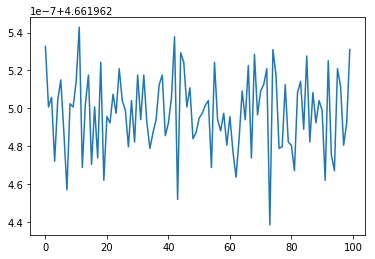

In [22]:
print("Training accuracy: %s" % train_acc)
print("Testing accuracy: %s" % test_acc)

losses=history.history['loss']
plt.plot(range(len(losses)), losses)
plt.show()

## Discussion

令人意外的是感覺應該功力最高的Neural Network做出來的結果竟然是**最差的**

我猜可能是因為選擇的model不適合，無法fitting出更好的準確度。

另外如果把Volume放入特徵訓練，似乎都會導向相同的結果，

都會把**全部的預測結果猜成1**，不知道是不是因為Volume這欄位的數值

比其他欄位**大非常多**，才導致這樣的結果。


### Accuracy

這次所分析的data總共兩千多筆，而且feature的項目也不多

我認為要能精準的預測股票市場的漲跌還是太困難了。

或者應該說，現在也還沒有人能夠準確的分析以及預測股票，

股票漲幅**牽涉的原因**太多了，沒人說得準。












